In [30]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import hvplot.pandas


In [31]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [32]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [33]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaler



StandardScaler()

In [34]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(market_data_df)

# Copy the crypto names from the original data
crypto_names = market_data_df.index.to_list()

# Display sample data
market_data_df.head(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


### Find the Best Value for k Using the Original Scaled DataFrame.

In [35]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)


# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=2)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


# Display the DataFrame
df_elbow.head(10)


c:\Users\kevin\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kevin\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kevin\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kevin\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,55.763391
6,7,44.237520
7,8,41.068743
8,9,36.933822
9,10,29.836181


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

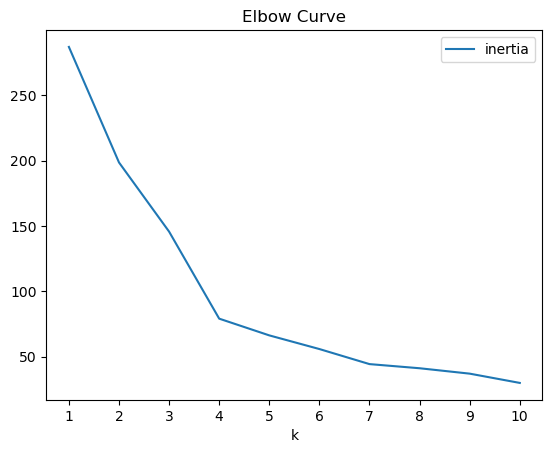

In [36]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                     y="inertia",
                     title="Elbow Curve",
                     xticks=k_values)


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [55]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=2)



In [56]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data)


c:\Users\kevin\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

In [57]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_values = kmeans.predict(scaled_data)


# View the resulting array of cluster values.
cluster_values


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [58]:
# Create a copy of the DataFrame
clustered_df = market_data_df.copy()


In [60]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = kmeans.labels_


# Display sample data
clustered_df.head(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


In [62]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.hvplot.scatter(x="price_change_percentage_24h",
                            y="price_change_percentage_7d",
                            by="class",
                            hover_cols=["coin_name"],
                            title="Cryptocurrency Performance",
                            xlabel="24h Price Change (%)",
                            ylabel="7d Price Change (%)",
                            cmap="rainbow")


:NdOverlay   [class]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

### Optimize Clusters with Principal Component Analysis.

In [63]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [66]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(scaled_data)


# View the first five rows of the DataFrame.
crypto_pca[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [67]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?


**Answer:** 0.8950316570309841

In [68]:
total_explained_variance = pca.explained_variance_ratio_.sum()
total_explained_variance


0.8950316570309841

In [70]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pcs_df = pd.DataFrame(
    data=crypto_pca, columns=["PC1", "PC2", "PC3"], index=crypto_names
)

# Creating a DataFrame with the PCA data
pcs_df.head(5)


# Copy the crypto names from the original data
crypto_names = market_data_df.index.to_list()


# Set the coinid column as index
pcs_df.index = market_data_df.index


# Display sample data
pcs_df.head(10)


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [73]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)


# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=2)
    kmeans.fit(pcs_df)
    inertia.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


# Display the DataFrame
df_elbow.head(10)


c:\Users\kevin\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kevin\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kevin\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kevin\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,38.584870
5,6,27.618972
6,7,23.793714
7,8,17.823822
8,9,14.123195
9,10,11.116837


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

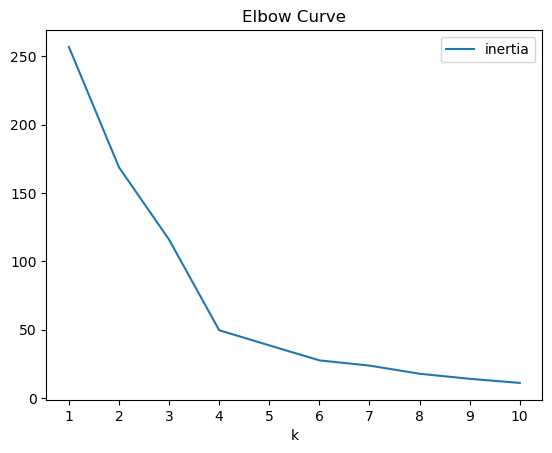

In [74]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                     y="inertia",
                     title="Elbow Curve",
                     xticks=k_values)


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [75]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=2)


In [76]:
# Fit the K-Means model using the PCA data
kmeans.fit(pcs_df)


c:\Users\kevin\anaconda3\envs\dev2\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

In [77]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_values = kmeans.predict(pcs_df)


# Print the resulting array of cluster values.
cluster_values


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [78]:
# Create a copy of the DataFrame with the PCA data
clustered_df = pcs_df.copy()


# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = kmeans.labels_


# Display sample data
clustered_df.head(5)


,PC1,PC2,PC3,class
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [79]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Use "rainbow" for the color to better visualize the data.
clustered_df.hvplot.scatter(x="PC1",
                            y="PC2",
                            by="class",
                            hover_cols=["coin_name"],
                            title="Cryptocurrency Performance",
                            xlabel="PCA1",
                            ylabel="PCA2",
                            cmap="rainbow")


:NdOverlay   [class]
   :Scatter   [PC1]   (PC2)

### Determine the Weights of Each Feature on each Principal Component

In [81]:
# Use the columns from the original scaled DataFrame as the index.
pcs_df.index = market_data_df.index


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 

* **Answer:** The features with the strongest positive or negative influence on each principal component can be determined by examining the PCA components. The components are stored in the `pca.components_` attribute, which provides the weights of each feature for each principal component.
    